In [157]:
from pylab import *
from io import StringIO
import numpy
from scipy.optimize import curve_fit
%matplotlib inline

In [158]:
#Carico i file

s = open("pressione_13.txt").read()
t,P = transpose(loadtxt(StringIO(s)))
s = open("temperatura_13.txt").read()
t,T = transpose(loadtxt(StringIO(s)))
s = open("posizione_13.txt").read()
t,L = transpose(loadtxt(StringIO(s)))

In [159]:
#Calcolo le grandezze di interesse
P = P * 1000
V = L * (32.5/2000)**2 * pi *10**6
T = T + 273.15

DV = V - min(V)
DT = T - min(T)

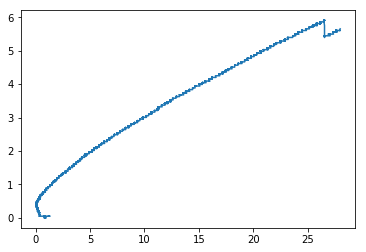

In [160]:
#Genero il grafico preliminare

plot(DT,DV)

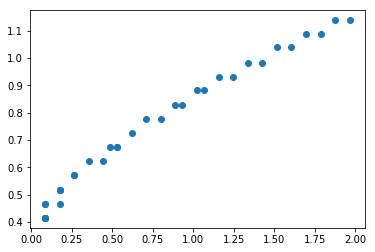

In [161]:
#Pulisco il grafico
DVpulito = DV[(DV>0.4)&(DT<2)]
DTpulito = DT[(DV>0.4)&(DT<2)]

plot (DTpulito[::100], DVpulito[::100], "o", label='dati')

m= 0.384676845381 +/- 1.03359042122e-06
q= 0.448599636871 +/- 9.89764215765e-07
dm= 0.0113890950062


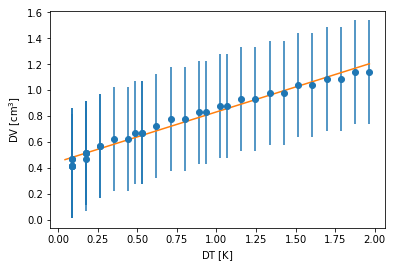

In [182]:
#Produco il fit lineare
def retta(x, m, q):
    return m*x+q

sigma_V = DVpulito - DVpulito + 0.4
x = numpy.linspace(min(DTpulito), max(DTpulito), 200)
fitPar, fitErrors = curve_fit(retta, DTpulito, DVpulito, sigma=sigma_V)

print("m=", fitPar[0], "+/-", fitErrors[0,0])
print("q=", fitPar[1], "+/-", fitErrors[1,1])
xlabel("DT [$\mathrm{K}$]")
ylabel("DV [$\mathrm{cm}^3$]")

errorbar(DTpulito[::100], DVpulito[::100], yerr=0.4, fmt="o")
plot(x, x*fitPar[0]+fitPar[1], "-")

savefig("charles.pdf", bbox_inches='tight')

#Calcolo l'incertezza sul coefficiente angolare
x2medio = 0
xmedio2 = 0
j = 0
for x in DTpulito:
    x2medio = x2medio + x*x
    xmedio2 = xmedio2 +x
    j = j+1
x2medio = x2medio / j
xmedio2 = (xmedio2/ j)**2


varM = (len(DVpulito)*(x2medio - xmedio2)/(0.4**2))**(-1)
print("dm=", sqrt(varM))

In [183]:
#Numero di moli attese
P0 = 1.01*10**5
R = 8.31
V0 = 8.93*10**(-5)+0.033*pi*(32.5/2000)**2
print(V0)
T0 = mean(T[:10])
deltaT0 = std(T[:10])
print("T0=", T0, "+/-", deltaT0)
n_attese = P0 * V0 / (R * T0)
print("N_attese=", n_attese)

#Calcolo il numero di moli a partire dal risultato del fit
m = fitPar[0]
n = m*10**(-6) * P0 / R
deltam = fitErrors[0,0]
deltan = n * sqrt((sqrt(varM)/m)**2)
print("n=", n, "+/-", deltan)

0.00011667603473292231
T0= 297.183431 +/- 0.013443
N_attese= 0.00477174710544
n= 0.00467537441438 +/- 0.000138423417043


In [164]:
chi2 = 0
i = 0
deltay= 0.04*10**(-5)
print(deltay)
for y in DVpulito:
    chi2 = chi2 + (y - fitPar[0]*DTpulito[i] - fitPar[1])**2/(deltay**2)
    i = i+1

print(chi2)
print("Gradi di liberta'", i-1)

4.0000000000000003e-07
2.67578202515e+13
Gradi di liberta' 3359


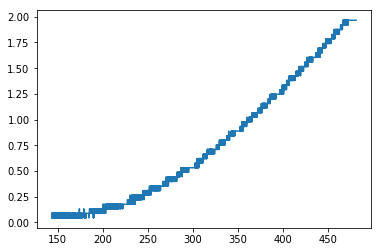

In [185]:
plot(t[(DV>0.4)&(DT<2)], DTpulito)